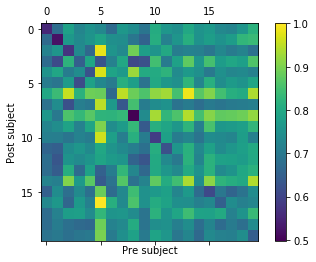

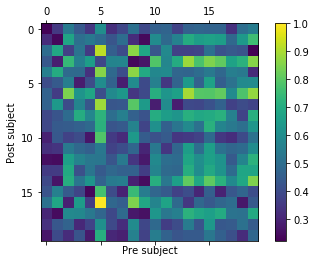

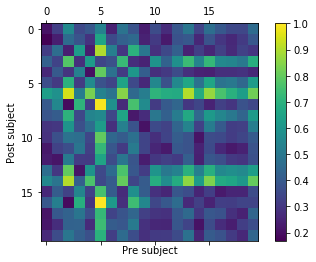

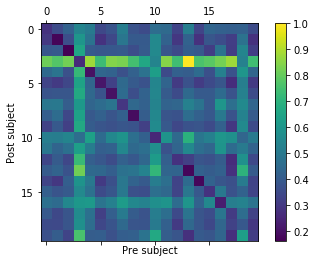

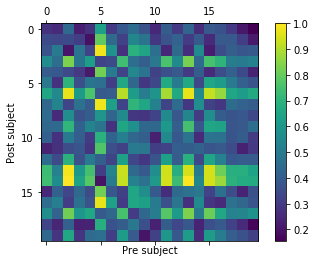

[     0.          62917.41722203  35689.63431792 ...,   9418.76314382
  18603.55662472      0.        ]
(6724,)
[  0.           5.67110559  26.13523991 ..., -24.7314285  -37.2998799    0.        ]


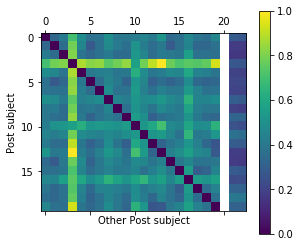

F_onewayResult(statistic=array([ 1.10217346]), pvalue=array([  7.05799492e-78]))
F_onewayResult(statistic=array([ 0.95348508]), pvalue=array([ 0.56458065]))
F_onewayResult(statistic=array([ 0.63377782]), pvalue=array([ 0.97568049]))


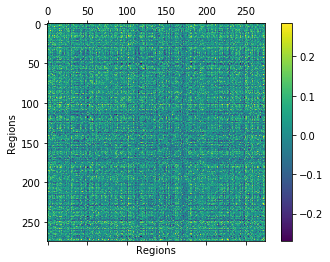

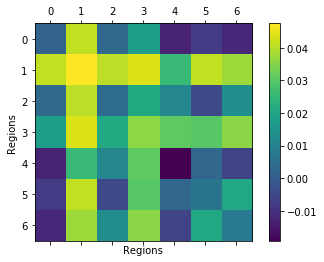

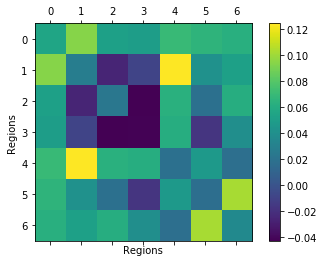

Success rate: 6 / 10


In [5]:
%run 'exploration-v1.ipynb'

# Dimensionality reduction

In order to prevent overfitting due to the large data-size compared to number of samples, we perform dimensionality reduction on our data.

We have 5 types of reducers:

- Null-RS Reducer
  * A simple passthrough reduction on RSFC, where all information is preserved as-is
- Yeo-RS Reducer
  * Reduction based on Yeo 7-Region Parcellation on RSFC
- Hierarchical Clustering RS Reducer
  * Reduction based on Hierarchical Clustering on RSFC of 20 Training Subjects
- Null FS Reducer
  * A simple passthrough reduction on DTI Connectivity, where all information is preserved as-is
- Hierarchical Clustering FS Reducer
  * Reduction based on Hierarchical Clustering on DTI Connectivity of 20 Training Subjects

Cluster Visualization
[274 275 276 277]


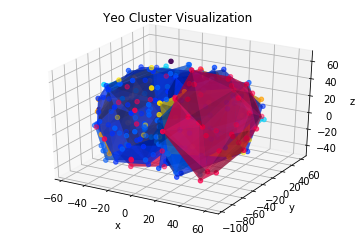

In [6]:
main.cluster_vis() # visualize Yeo Clusters ...z

# Similarity Matrices

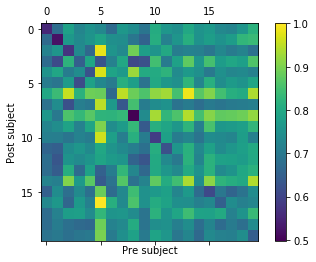

In [13]:
fig = plotSimilarityMatrix(subjects, nullRSreducer)

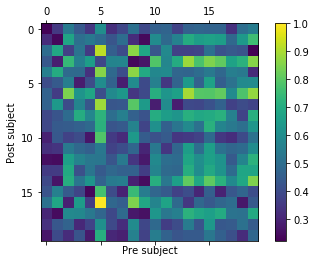

In [14]:
fig = plotSimilarityMatrix(subjects, clusteringRSreducer)

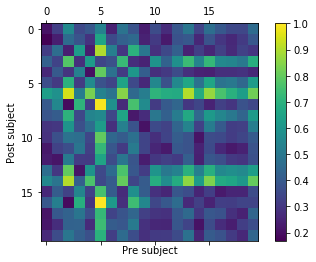

In [15]:
fig = plotSimilarityMatrix(subjects, yeoRSreducer)

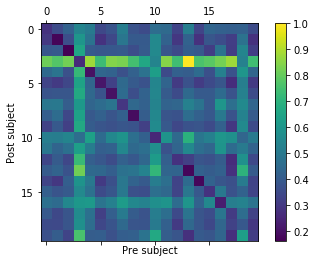

In [16]:
fig = plotSimilarityMatrix(subjects, nullFSreducer)

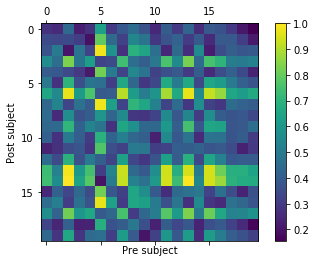

In [17]:
fig = plotSimilarityMatrix(subjects, clusteringFSreducer)

## Effect-size-like-stuff

In [18]:
reducer = nullFSreducer

subjects['reducedPre'] = [reducer(subj, True) for subj in subjects.data]
subjects['reducedPost'] = [reducer(subj, False) for subj in subjects.data]

In [19]:
postVariance = np.var(subjects.reducedPost.as_matrix())
print postVariance
subjects.reducedPost.as_matrix();

[     0.          62917.41722203  35689.63431792 ...,   9418.76314382
  18603.55662472      0.        ]


# Directionality modelling

In [21]:
subjects['delta'] = subjects.reducedPost - subjects.reducedPre
subjects.head()

,folder,data,reducedPre,reducedPost,delta
1,Behavioral-Analyzed-Data/training/1,<__main__.Subject object at 0x7f1ada7f7150>,"[0.0, 411.6548583, 245.835252436, 227.17283950...","[0.0, 438.531027467, 256.727595386, 340.524038...","[0.0, 26.8761691673, 10.8923429502, 113.351198..."
2,Behavioral-Analyzed-Data/training/2,<__main__.Subject object at 0x7f1ada147610>,"[0.0, 266.594594595, 83.2254616132, 87.4235924...","[0.0, 549.92690678, 86.6288461538, 118.7257844...","[0.0, 283.332312185, 3.40338454063, 31.3021919..."
3,Behavioral-Analyzed-Data/training/3,<__main__.Subject object at 0x7f1ada1477d0>,"[0.0, 893.836875359, 209.549833095, 164.518681...","[0.0, 714.309027778, 115.080357143, 120.571847...","[0.0, -179.527847581, -94.469475952, -43.94683..."
4,Behavioral-Analyzed-Data/training/4,<__main__.Subject object at 0x7f1ada15fb90>,"[0.0, 370.537787514, 456.880110243, 251.801619...","[0.0, 730.798572157, 511.17877338, 271.5162548...","[0.0, 360.260784643, 54.2986631363, 19.7146354..."
5,Behavioral-Analyzed-Data/training/5,<__main__.Subject object at 0x7f1ada16f750>,"[0.0, 744.692073171, 306.807620818, 136.982681...","[0.0, 702.096537251, 225.512285582, 110.604432...","[0.0, -42.5955359199, -81.295335236, -26.37824..."


In [22]:
meanDelta = np.mean(subjects.delta)
print meanDelta.shape
print meanDelta

(6724,)
[  0.           5.67110559  26.13523991 ..., -24.7314285  -37.2998799    0.        ]


In [23]:
subjects['forecastedPost'] = subjects.reducedPre + meanDelta
subjects.head()

,folder,data,reducedPre,reducedPost,delta,forecastedPost
1,Behavioral-Analyzed-Data/training/1,<__main__.Subject object at 0x7f1ada7f7150>,"[0.0, 411.6548583, 245.835252436, 227.17283950...","[0.0, 438.531027467, 256.727595386, 340.524038...","[0.0, 26.8761691673, 10.8923429502, 113.351198...","[0.0, 417.325963887, 271.970492344, 253.084212..."
2,Behavioral-Analyzed-Data/training/2,<__main__.Subject object at 0x7f1ada147610>,"[0.0, 266.594594595, 83.2254616132, 87.4235924...","[0.0, 549.92690678, 86.6288461538, 118.7257844...","[0.0, 283.332312185, 3.40338454063, 31.3021919...","[0.0, 272.265700182, 109.360701521, 113.334965..."
3,Behavioral-Analyzed-Data/training/3,<__main__.Subject object at 0x7f1ada1477d0>,"[0.0, 893.836875359, 209.549833095, 164.518681...","[0.0, 714.309027778, 115.080357143, 120.571847...","[0.0, -179.527847581, -94.469475952, -43.94683...","[0.0, 899.507980946, 235.685073003, 190.430054..."
4,Behavioral-Analyzed-Data/training/4,<__main__.Subject object at 0x7f1ada15fb90>,"[0.0, 370.537787514, 456.880110243, 251.801619...","[0.0, 730.798572157, 511.17877338, 271.5162548...","[0.0, 360.260784643, 54.2986631363, 19.7146354...","[0.0, 376.208893101, 483.015350152, 277.712992..."
5,Behavioral-Analyzed-Data/training/5,<__main__.Subject object at 0x7f1ada16f750>,"[0.0, 744.692073171, 306.807620818, 136.982681...","[0.0, 702.096537251, 225.512285582, 110.604432...","[0.0, -42.5955359199, -81.295335236, -26.37824...","[0.0, 750.363178758, 332.942860726, 162.894054..."


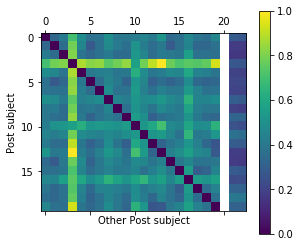

In [24]:
dirMatrix = np.zeros([len(subjects), len(subjects) + 3])
for i, post in subjects.reducedPost.iteritems():
    # For each post scan
    for j, otherpost in subjects.reducedPost.iteritems():
        # How similar is it to each pre scan
        dirMatrix[i-1, j-1] = dist_func(post, otherpost)
    
    # How similar is it to its own pre scan?
    dirMatrix[i-1,-1] = dist_func(subjects.forecastedPost[i], post)
    # How similar is it to the prediction?
    dirMatrix[i-1,-2] = dist_func(subjects.reducedPre[i], post)
    
    dirMatrix[i-1,-3] = float('nan')

dirMatrix /= np.nanmax(dirMatrix)

cax = plt.matshow(dirMatrix)

plt.colorbar(cax)
# plt.title('Correlation between incomming and outgoing scans')
plt.xlabel('Other Post subject')
plt.ylabel('Post subject')

plt.savefig('DirectionMap.png', dpi=500, transparent=True)

## Regional Directionality

In order to observe whether or not there exist consistent trends in how regional connectivity change pre- to post-training, we 

F_onewayResult(statistic=array([ 1.10217346]), pvalue=array([  7.05799492e-78]))
F_onewayResult(statistic=array([ 0.95348508]), pvalue=array([ 0.56458065]))
F_onewayResult(statistic=array([ 0.63377782]), pvalue=array([ 0.97568049]))


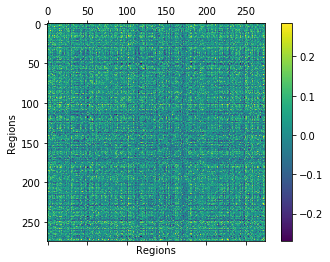

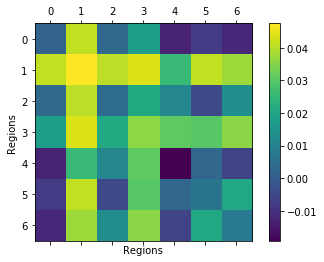

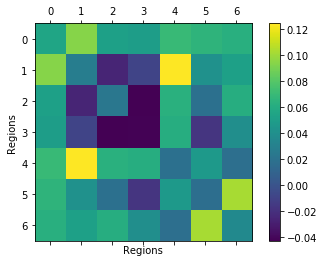

In [26]:
fig = plotRegionalChange(subjects, nullRSreducer)
fig = plotRegionalChange(subjects, yeoRSreducer)
fig = plotRegionalChange(subjects, clusteringRSreducer)

## SVM-based Directionality Prediction

Whereas we have observed large p-values in the previous ANOVA test, we seek to validate the results on basis of whether or not we can classify pre-to-post directionality data with an SVM classifier.

In [8]:
res, classifier = trainSvm(subjects, clusteringRSreducer)
res, classifier = trainSvm(subjects, yeoRSreducer)
res, classifier = trainSvm(subjects, nullRSreducer)

Success rate: 6 / 10
Success rate: 0 / 10
Success rate: 4 / 10


Here, we observe that, interestingly, the SVM based on the Yeo-7 Parcellated clusters consistently perform worse than random.